In [2]:
import geopandas
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image
import progressbar as bar

import os
import imageio

In [3]:
# 資料篩選

def Filter_data(path):

    column = ['time','longitude','latitude','scale','depth']

    CWBdata = pd.read_csv(path, encoding='big5')
    Sortdata = pd.DataFrame(np.array(CWBdata[:len(CWBdata)].iloc[::-1]), columns=column)

    frequencytotal = np.unique(Sortdata['scale'], return_counts=True)
    frequencydict = dict(zip(frequencytotal[1], frequencytotal[0]))

    filterscale = Sortdata['scale'] >= frequencydict.get(max(frequencytotal[1]))
    filterdata = pd.DataFrame(np.array(Sortdata[filterscale]), columns=column).dropna(axis = 0)
    
    return filterdata

In [4]:
data = Filter_data('D:/Dataset/Earthquake/Original/CWB_593634_19990101_20201231.csv')

In [5]:
# 時間拆分

def Data_time_Split(data):
    
    data['time'] = pd.to_datetime(data['time'])
    data['year'] = pd.to_datetime(data['time']).dt.year
    data['month'] = pd.to_datetime(data['time']).dt.month
    data['day'] = pd.to_datetime(data['time']).dt.day
    
    data = data[['time','year','month','day','longitude','latitude','scale','depth']]
    
    return data

In [6]:
data = Data_time_Split(data)

In [7]:
Worldmap = geopandas.read_file("D:\Dataset\WorldMap\gadm36_0.shp",encoding='utf-8')

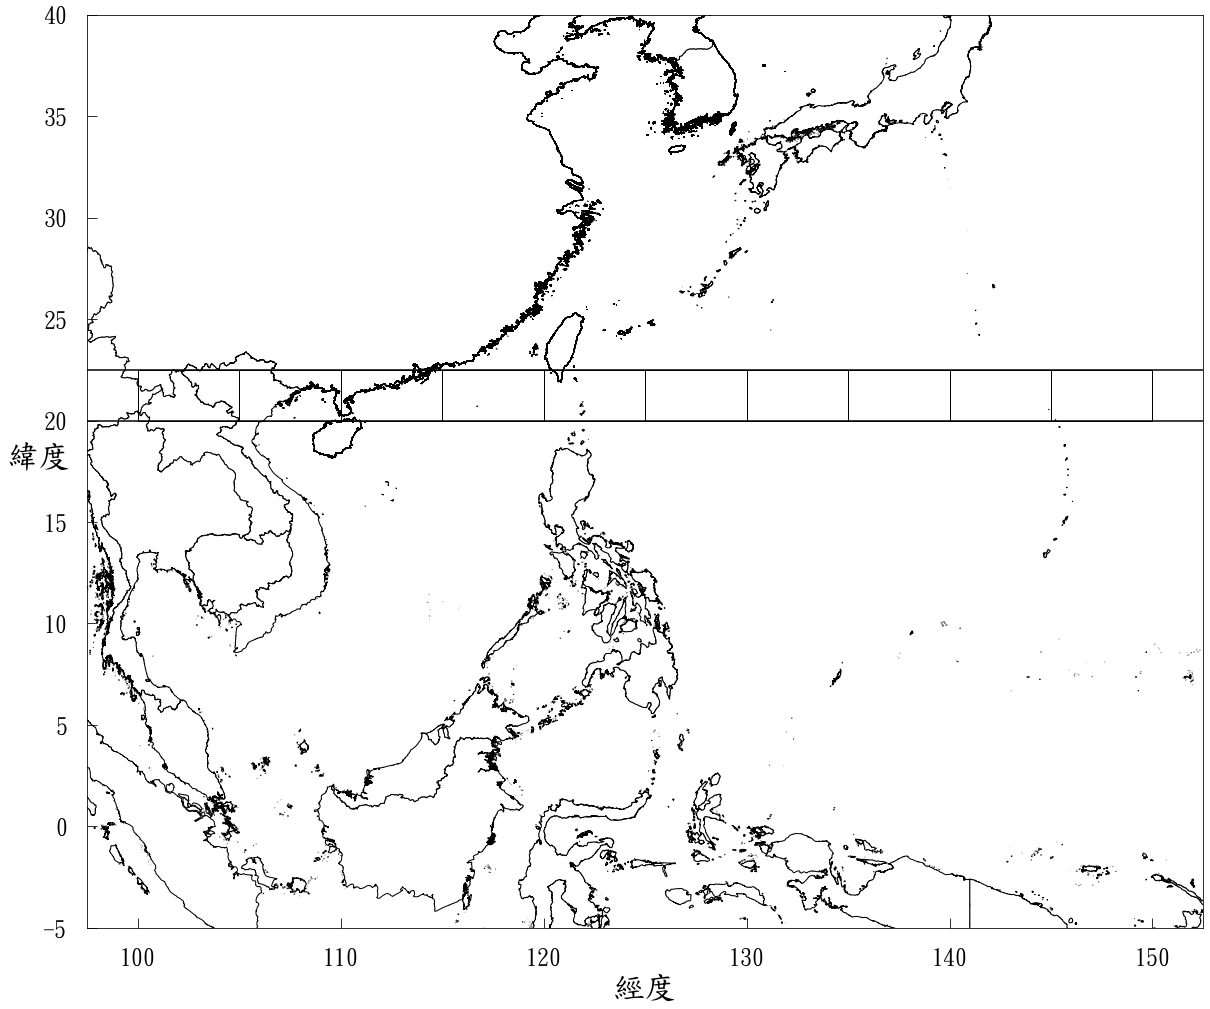

In [19]:
Worldmap.plot(figsize=(20,20),color='white',edgecolor='k')

plt.rcParams['font.sans-serif'] = 'DFKai-SB'
plt.rcParams['axes.unicode_minus'] = False

plt.xlabel('經度',fontsize=32)
plt.ylabel('緯度',fontsize=32,rotation=0)

plt.tick_params(direction='in',length=10,labelsize=24,color='k',pad=20)

ax = plt.gca()

rect1 = patches.Rectangle((100,20),50,2.5,edgecolor='k',fill=False,ls='-')
rect2 = patches.Rectangle((105,20),40,2.5,edgecolor='k',fill=False,ls='-')
rect3 = patches.Rectangle((110,20),30,2.5,edgecolor='k',fill=False,ls='-')
rect4 = patches.Rectangle((115,20),20,2.5,edgecolor='k',fill=False,ls='-')
rect5 = patches.Rectangle((120,20),10,2.5,edgecolor='k',fill=False,ls='-')
rect6 = patches.Rectangle((125,20),0,2.5,edgecolor='k',fill=False,ls='-')

ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)
ax.add_patch(rect6)

plt.axis([97.5,152.5,-5,40])

plt.axhline(22.5, c='k', ls='-')
plt.axhline(20, c='k', ls='-')

plt.draw()

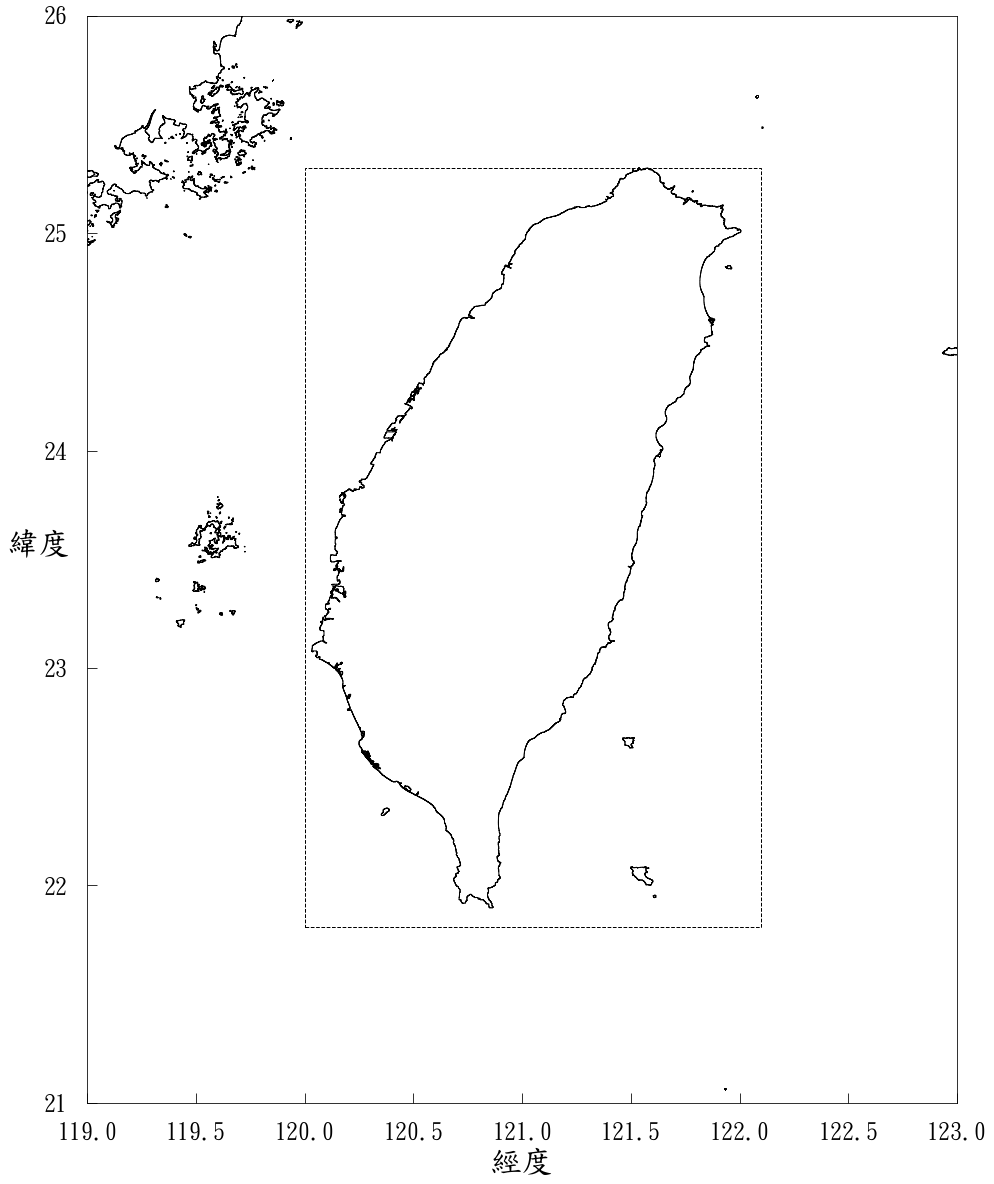

In [123]:
Worldmap.plot(figsize=(20,20),color='white',edgecolor='k')

plt.rcParams['font.sans-serif'] = 'DFKai-SB'
plt.rcParams['axes.unicode_minus'] = False

plt.xlabel('經度',fontsize=32)
plt.ylabel('緯度',fontsize=32,rotation=0)

plt.tick_params(direction='in',length=10,labelsize=24,color='k',pad=20)

ax = plt.gca()

rect1 = patches.Rectangle((120,21.81),2.1,3.49,edgecolor='k',fill=False,ls='--')

ax.add_patch(rect1)

plt.axis([119,123,21,26])

plt.savefig('C:/Users/btea4/OneDrive\桌面\圖表\圖\第四章/圖4-1研究範圍輪廓圖.png')

plt.draw()

In [112]:
def EveryEarthquake(startyear,endyear,startmonth,endmonth):
    
    Worldmap.plot(figsize=(20,20),color='white',edgecolor='k')

    plt.rcParams['font.sans-serif'] = 'DFKai-SB'
    plt.rcParams['axes.unicode_minus'] = False

    plt.xlabel('經度',fontsize=32)
    plt.ylabel('緯度',fontsize=32,rotation=0)

    years = np.arange(startyear,endyear)
    months = np.arange(startmonth,endmonth)
    
    plt.tick_params(direction='in',length=10,labelsize=24,color='k',pad=20)
    plt.axis([119,123,21,26])
    for year in bar.progressbar(years):
        
        daylist = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

        if (year%4==0 and year%100!=0) or (year%400==0) : 
            
            daylist = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
        
        for month in months:
            
            days = np.arange(1,daylist[month-1]+1)

            for day in days:
                
                path = 'C:/Users/btea4/OneDrive\桌面\博士入學\備審\口試簡報\每日地震圖/'+str(day)
                
                lon = data[(data['year']==year)&(data['month']==month)&(data['day']==day)]['longitude']
                lat = data[(data['year']==year)&(data['month']==month)&(data['day']==day)]['latitude']
                size = data[(data['year']==year)&(data['month']==month)&(data['day']==day)]['scale']
                
                plt.scatter(lon,lat,list(size*50),list(size),cmap='coolwarm')

                plt.savefig(path)

100% (1 of 1) |##########################| Elapsed Time: 0:08:30 Time:  0:08:30


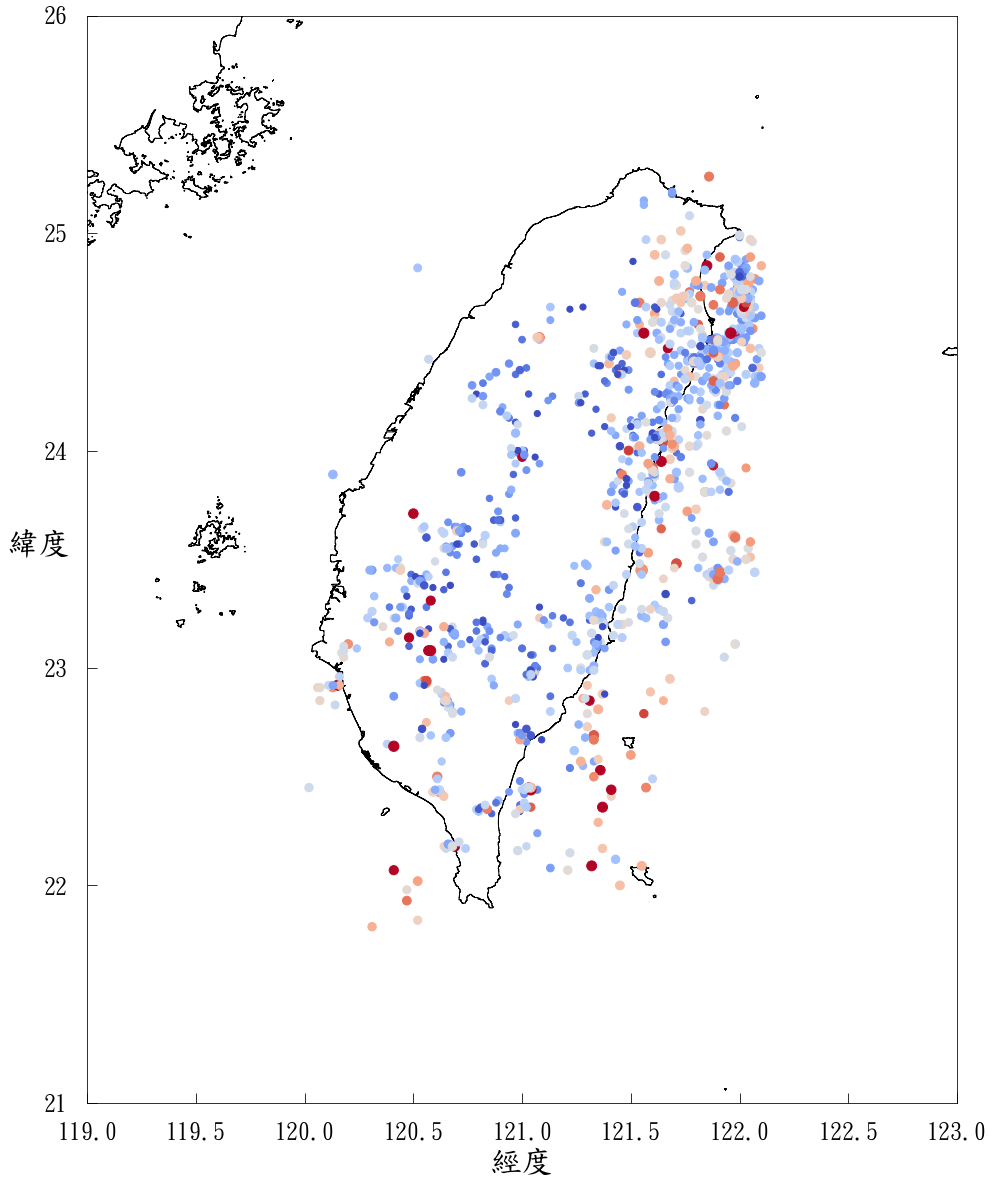

In [111]:
EveryEarthquake(2020,2021,12,13)

In [22]:
path = 'C:/Users/btea4/OneDrive\桌面\論文草稿\神經元檢定'

pic_lst = os.listdir(path)

gif_images = []

for name in pic_lst:
    
    filename = os.path.join(path,name)
    gif_images.append(imageio.imread(filename))  # 讀取圖片

imageio.mimsave('C:/Users/btea4/OneDrive\桌面\論文草稿\神經元檢定/10.gif',gif_images, 'GIF', duration=0.5)

In [131]:
path = 'C:/Users/btea4/OneDrive\桌面\博士入學\備審\口試簡報\每日地震圖'

pic_lst = os.listdir(path)

gif_images = []

for name in pic_lst:
    
    filename = os.path.join(path,name)
    gif_images.append(imageio.imread(filename))  # 讀取圖片

imageio.mimsave('C:/Users/btea4/OneDrive\桌面\博士入學\備審\口試簡報\每日地震圖/202012.gif',gif_images, 'GIF', duration=0.5)

C:\Users\btea4\Anaconda3\lib\site-packages\geopandas\plotting.py:358: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()


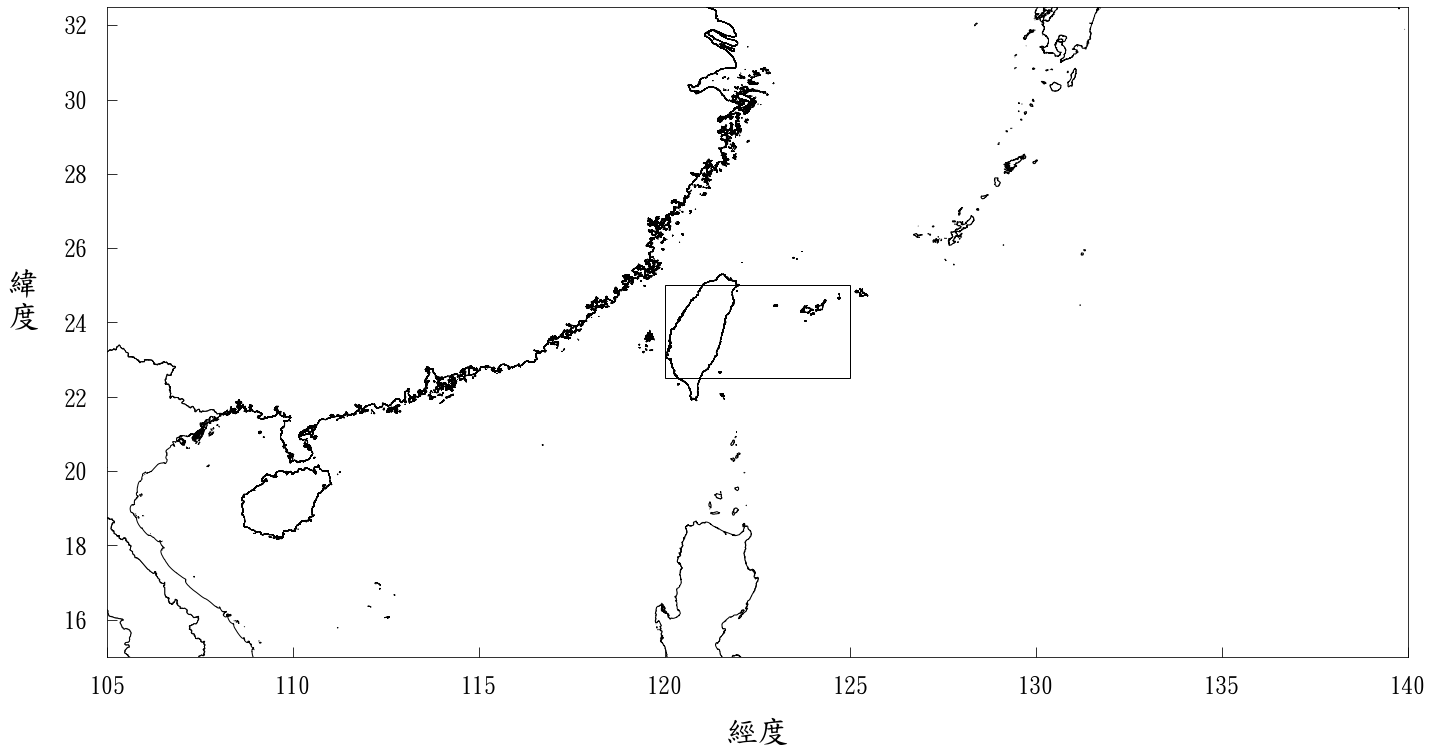

In [9]:
# 地圖 1X1

Worldmap = geopandas.read_file("D:\Dataset\WorldMap\gadm36_0.shp",encoding='utf-8')

Worldmap.plot(figsize=(20,20),color='white',edgecolor='k')

plt.rcParams['font.sans-serif'] = 'DFKai-SB'

plt.xlabel('經度',fontsize=32,labelpad=20)
plt.ylabel('\n'.join(('緯','度')),fontsize=32,labelpad=40,rotation='horizontal')

plt.tick_params(direction='in',length=10,labelsize=24,color='k',pad=20)

ax = plt.gca() # 120~125 22.5~25

rect1 = patches.Rectangle((120,22.5),5,2.5,edgecolor='k',fill=False,ls='-')

ax.add_patch(rect1)

plt.axis([105,140,15,32.5])

plt.tight_layout()
plt.savefig('C:/Users/btea4/OneDrive\桌面\圖表\圖\第四章/圖4-5台灣上空全電子含量數值分布示意圖.png')
plt.draw()

C:\Users\btea4\Anaconda3\lib\site-packages\geopandas\plotting.py:358: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()


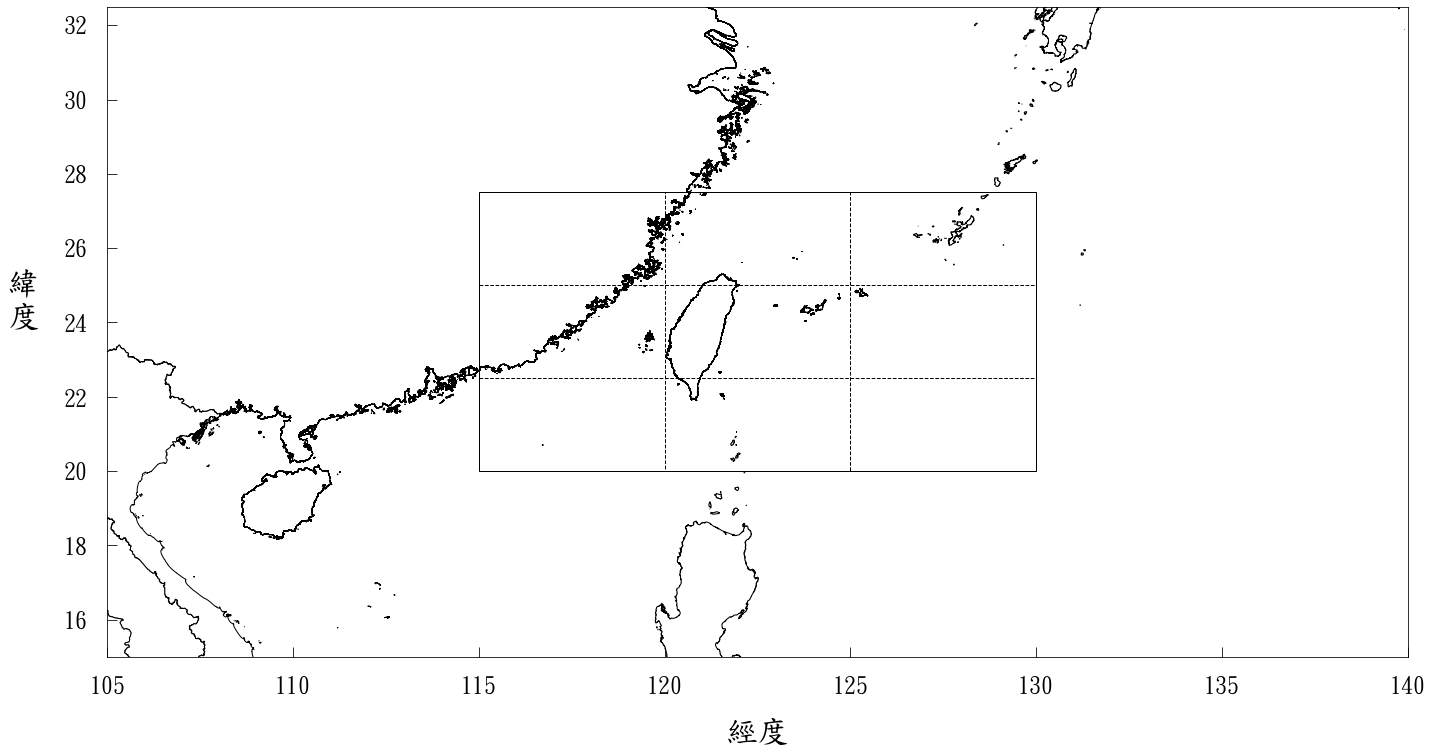

In [10]:
# 地圖 3X3

Worldmap = geopandas.read_file("D:\Dataset\WorldMap\gadm36_0.shp",encoding='utf-8')

Worldmap.plot(figsize=(20,20),color='white',edgecolor='k')

plt.rcParams['font.sans-serif'] = 'DFKai-SB'

plt.xlabel('經度',fontsize=32,labelpad=20)
plt.ylabel('\n'.join(('緯','度')),fontsize=32,labelpad=40,rotation='horizontal')

plt.tick_params(direction='in',length=10,labelsize=24,color='k',pad=20)

ax = plt.gca() # 115~130 20~27.5

rect1 = patches.Rectangle((115,20),15,7.5,edgecolor='k',fill=False,ls='-')

rect2 = patches.Rectangle((120,20),5,7.5,edgecolor='k',fill=False,ls='--')
rect3 = patches.Rectangle((115,22.5),15,2.5,edgecolor='k',fill=False,ls='--')

ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)

plt.axis([105,140,15,32.5])

plt.tight_layout()
plt.savefig('C:/Users/btea4/OneDrive\桌面\圖表\圖\第四章/圖4-6台灣上空全電子含量數值分布示意圖.png')
plt.draw()

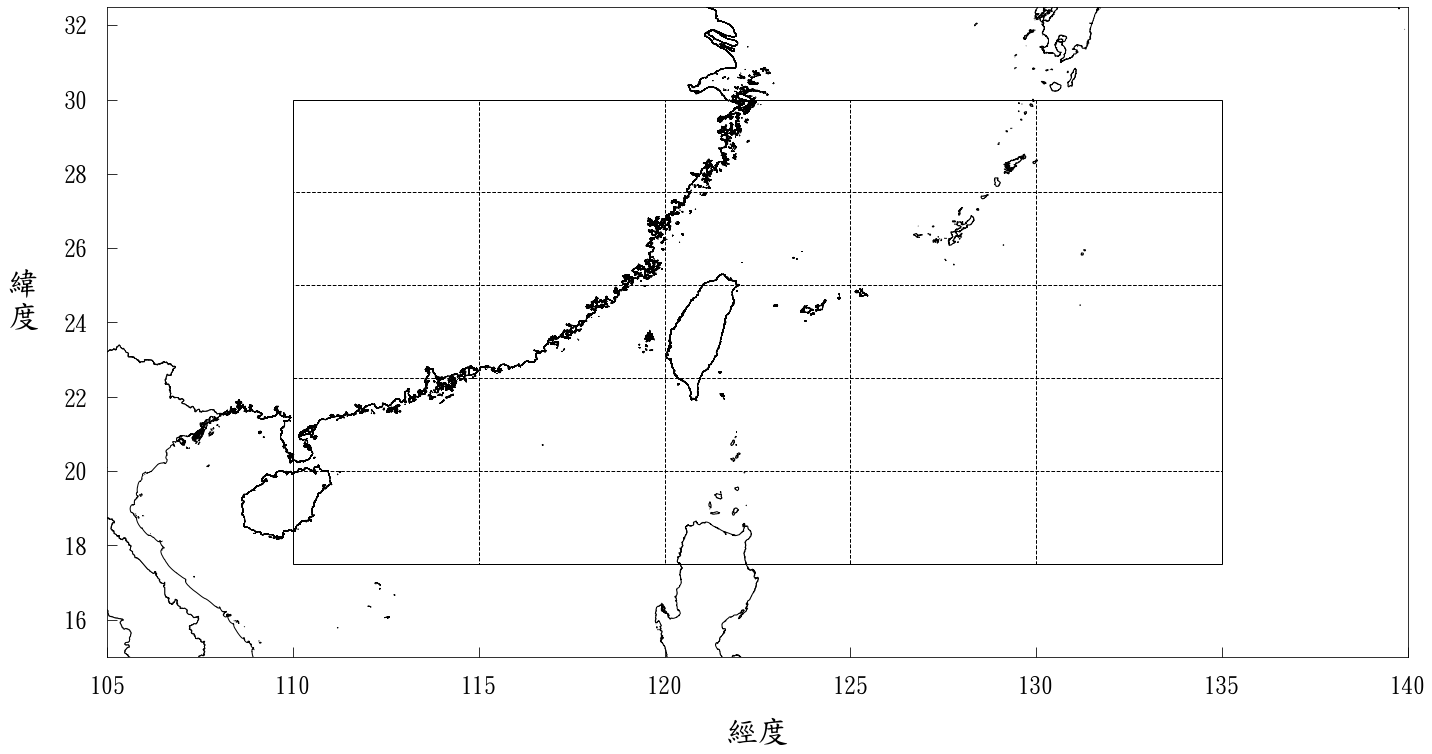

In [3]:
# 地圖 5X5

Worldmap = geopandas.read_file("D:\Dataset\WorldMap\gadm36_0.shp",encoding='utf-8')

Worldmap.plot(figsize=(20,20),color='white',edgecolor='k')

plt.rcParams['font.sans-serif'] = 'DFKai-SB'

plt.xlabel('經度',fontsize=32,labelpad=20)
plt.ylabel('\n'.join(('緯','度')),fontsize=32,labelpad=40,rotation='horizontal')

plt.tick_params(direction='in',length=10,labelsize=24,color='k',pad=20)

ax = plt.gca() # 110~135 17.5~30

rect1 = patches.Rectangle((110,17.5),25,12.5,edgecolor='k',fill=False,ls='-')

rect2 = patches.Rectangle((115,17.5),15,12.5,edgecolor='k',fill=False,ls='--')
rect3 = patches.Rectangle((120,17.5),5,12.5,edgecolor='k',fill=False,ls='--')

rect4 = patches.Rectangle((110,20),25,7.5,edgecolor='k',fill=False,ls='--')
rect5 = patches.Rectangle((110,22.5),25,2.5,edgecolor='k',fill=False,ls='--')

ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)

plt.axis([105,140,15,32.5])

plt.tight_layout()
plt.savefig('C:/Users/btea4/OneDrive\桌面\圖表\圖\第四章/圖4-7台灣上空全電子含量數值分布示意圖.png')
plt.draw()

C:\Users\btea4\Anaconda3\lib\site-packages\geopandas\plotting.py:358: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()


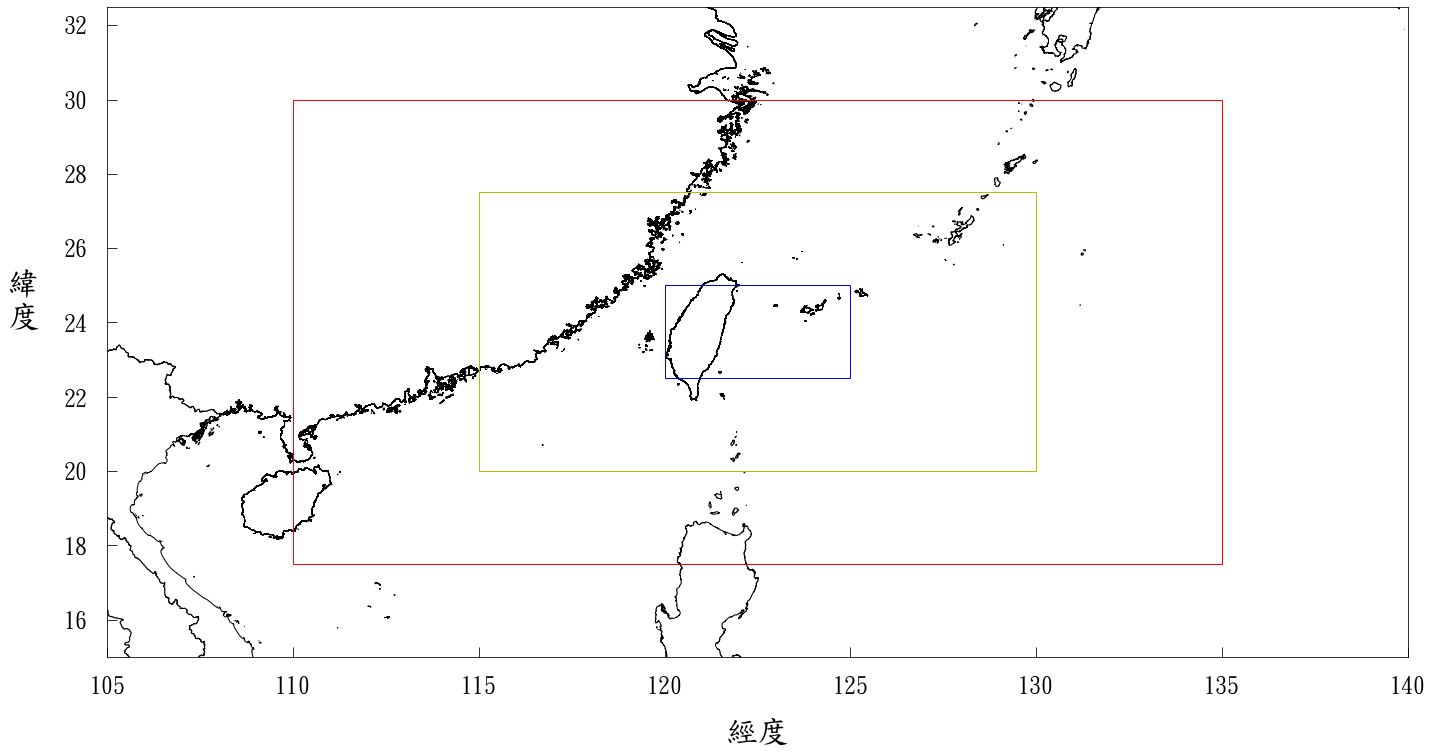

In [11]:
# 地圖 5X5 3 color

Worldmap = geopandas.read_file("D:\Dataset\WorldMap\gadm36_0.shp",encoding='utf-8')

Worldmap.plot(figsize=(20,20),color='white',edgecolor='k')

plt.rcParams['font.sans-serif'] = 'DFKai-SB'

plt.xlabel('經度',fontsize=32,labelpad=20)
plt.ylabel('\n'.join(('緯','度')),fontsize=32,labelpad=40,rotation='horizontal')

plt.tick_params(direction='in',length=10,labelsize=24,color='k',pad=20)

ax = plt.gca() # 110~135 17.5~30

rect1 = patches.Rectangle((110,17.5),25,12.5,edgecolor='r',fill=False,ls='-')

rect2 = patches.Rectangle((115,17.5),15,12.5,edgecolor='k',fill=False,ls='-')
rect3 = patches.Rectangle((120,17.5),5,12.5,edgecolor='k',fill=False,ls='-')

rect4 = patches.Rectangle((110,20),25,7.5,edgecolor='k',fill=False,ls='-')
rect5 = patches.Rectangle((110,22.5),25,2.5,edgecolor='k',fill=False,ls='-')

rect6 = patches.Rectangle((115,20),15,7.5,edgecolor='y',fill=False,ls='-')

rect7 = patches.Rectangle((120,22.5),5,2.5,edgecolor='b',fill=False,ls='-')

#ax.add_patch(rect2)
#ax.add_patch(rect3)
#ax.add_patch(rect4)
#ax.add_patch(rect5)
ax.add_patch(rect6)
ax.add_patch(rect7)
ax.add_patch(rect1)

plt.axis([105,140,15,32.5])

plt.tight_layout()
plt.savefig('C:/Users/btea4/OneDrive\桌面\博士入學\備審\口試簡報/台灣上空全電子含量數值分布示意圖.png')
plt.draw()